<a href="https://colab.research.google.com/github/BiancadeFrancisco/Analisando-Dataset-Vendas/blob/main/DESAFIO_5_NOVO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
compras = pd.read_csv("/content/data.csv", encoding='ISO-8859-1', sep = ",")
compras.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
# CONFERIR INFORMAÇÕES SOBRE DADOS:

compras.describe()

,Quantity,UnitPrice,CustomerID
count,276174.000000,276174.000000,197298.000000
mean,9.285371,5.049635,15287.916989
std,208.578504,113.847672,1730.488029
min,-74215.000000,0.000000,12346.000000
25%,1.000000,1.250000,13854.000000
50%,3.000000,2.100000,15152.000000
75%,10.000000,4.150000,16839.000000
max,74215.000000,38970.000000,18287.000000


In [ ]:
# CONFERIR EXISTENCIA DE LINHAS DUPLICADAS:

compras.duplicated().sum()

2223

In [ ]:
# REMOVER DADOS DUPLICADOS:

compras = compras.drop_duplicates()

In [ ]:
# CONFERIR EXISTENCIA DE VALORES NULOS:

compras.isna().sum().to_frame('Total_Nulos')

,Total_Nulos
InvoiceNo,0
StockCode,0
Description,1007
Quantity,1
InvoiceDate,1
UnitPrice,1
CustomerID,78846
Country,1


In [ ]:
# PERCENTUAL DOS VALORES NULOS EM RELAÇÃO AO TOTAL DOS DADOS:

(compras.isna().sum() / compras.shape[0] * 100).to_frame('Percentual_Nulos')

,Percentual_Nulos
InvoiceNo,0.000000
StockCode,0.000000
Description,0.367583
Quantity,0.000365
InvoiceDate,0.000365
UnitPrice,0.000365
CustomerID,28.780954
Country,0.000365


In [ ]:
# JUNTANDOS INFORMAÇÕES SOBRE DADOS NULOS:

(
compras.isna().sum().to_frame('Total_Nulos')
.join((compras.isna().sum() / compras.shape[0] * 100).to_frame('Percentual_Nulos'))
.sort_values('Total_Nulos', ascending=False)
)

,Total_Nulos,Percentual_Nulos
CustomerID,78846,28.780954
Description,1007,0.367583
Quantity,1,0.000365
InvoiceDate,1,0.000365
UnitPrice,1,0.000365
Country,1,0.000365
InvoiceNo,0,0.000000
StockCode,0,0.000000


In [ ]:
# REMOVER VALORES NULOS

compras = compras.dropna()


In [ ]:
compras.describe()

,Quantity,UnitPrice,CustomerID
count,195106.000000,195106.000000,195106.000000
mean,12.393560,3.776934,15281.689620
std,243.124476,96.039856,1731.295675
min,-74215.000000,0.000000,12346.000000
25%,2.000000,1.250000,13842.000000
50%,6.000000,1.950000,15145.000000
75%,12.000000,3.750000,16833.000000
max,74215.000000,38970.000000,18287.000000


In [ ]:
# ALTERAR TYPE DOS DADOS:

compras = compras.astype({"CustomerID":"int"})

In [ ]:
compras["InvoiceDate"] = compras["InvoiceDate"].str.replace(' \d{1,2}:\d\d', '', regex=True)

In [ ]:
compras["InvoiceDate"] = pd.to_datetime(compras["InvoiceDate"])

In [ ]:
compras["InvoiceDate"] = pd.to_datetime(compras["InvoiceDate"], format='%d/%m/%Y')

In [ ]:
compras.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195106 entries, 0 to 276173
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    195106 non-null  object        
 1   StockCode    195106 non-null  object        
 2   Description  195106 non-null  object        
 3   Quantity     195106 non-null  float64       
 4   InvoiceDate  195106 non-null  datetime64[ns]
 5   UnitPrice    195106 non-null  float64       
 6   CustomerID   195106 non-null  int64         
 7   Country      195106 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 13.4+ MB


In [ ]:
compras.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01,3.39,17850,United Kingdom


In [ ]:
compras[["Quantity", "UnitPrice"]].describe()

,Quantity,UnitPrice
count,195106.000000,195106.000000
mean,12.393560,3.776934
std,243.124476,96.039856
min,-74215.000000,0.000000
25%,2.000000,1.250000
50%,6.000000,1.950000
75%,12.000000,3.750000
max,74215.000000,38970.000000


In [ ]:
# APLICAR FILTROS PARA COLUNA PREÇO (UnitPrice) E COLUNA QUANTIDADE (Quantity):

compras = compras.query('Quantity > 0')
compras = compras.query('UnitPrice > 0')

In [ ]:
compras[["Quantity", "UnitPrice"]].describe()

,Quantity,UnitPrice
count,190297.000000,190297.000000
mean,13.410994,3.251793
std,176.133589,22.980700
min,1.000000,0.001000
25%,2.000000,1.250000
50%,6.000000,1.950000
75%,12.000000,3.750000
max,74215.000000,8142.750000


In [ ]:
from matplotlib import pyplot as plt

<Axes: >

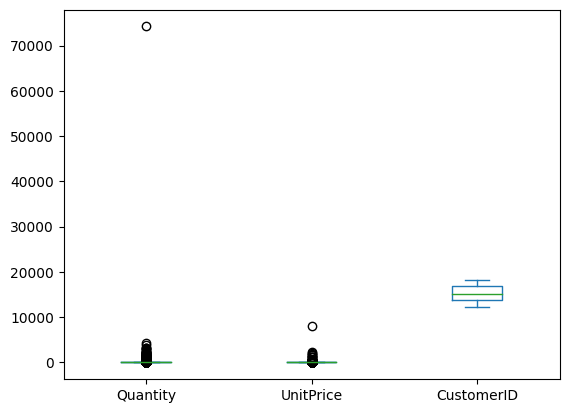

In [ ]:
# OUTLIERS:

compras.plot.box()

In [ ]:
# remova os outliers extremos em que a quantidade do item na compra é > a 10.000, e o preço unitário é > que 5.000

compras = compras.query('Quantity < 10000' and 'UnitPrice < 5000')

<Axes: >

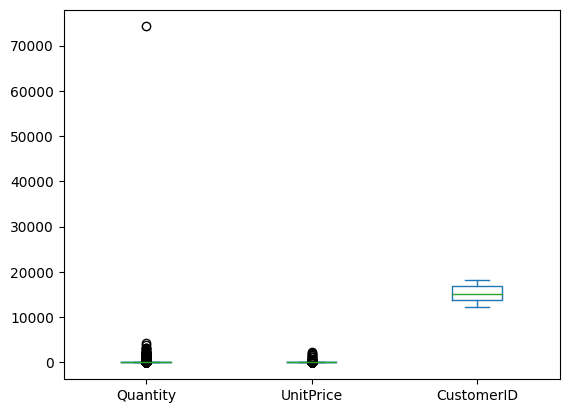

In [ ]:
compras.plot.box()

In [ ]:
compras.describe()

,Quantity,UnitPrice,CustomerID
count,190296.000000,190296.000000,190296.000000
mean,13.411060,3.209020,15289.244015
std,176.134049,13.415003,1730.757725
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13862.000000
50%,6.000000,1.950000,15157.000000
75%,12.000000,3.750000,16839.000000
max,74215.000000,2382.920000,18287.000000


In [ ]:
# CRIAR COLUNA ADICIONAL COM O NOME "PrecoTotalCompra", UTILIZANDO "Quantity" e "UnitPrice"

compras["PrecoTotalCompra"] = compras["Quantity"] * compras["UnitPrice"]
compras.head()

<ipython-input-29-33267d3a1682>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compras["PrecoTotalCompra"] = compras["Quantity"] * compras["UnitPrice"]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,PrecoTotalCompra
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01,3.39,17850,United Kingdom,20.34


In [ ]:
compras.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190296 entries, 0 to 276173
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   InvoiceNo         190296 non-null  object        
 1   StockCode         190296 non-null  object        
 2   Description       190296 non-null  object        
 3   Quantity          190296 non-null  float64       
 4   InvoiceDate       190296 non-null  datetime64[ns]
 5   UnitPrice         190296 non-null  float64       
 6   CustomerID        190296 non-null  int64         
 7   Country           190296 non-null  object        
 8   PrecoTotalCompra  190296 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 14.5+ MB


In [ ]:
# Calcule a data da última compra no dataset como um todo, pois vamos utilizar este valor como data de comparação para cálculo da recência
# Utilizar a função max()

UltimaCompra = compras["InvoiceDate"].max()

UltimaCompra

Timestamp('2011-07-24 00:00:00')

In [ ]:
PrimeiraCompra = compras["InvoiceDate"].min()

PrimeiraCompra

Timestamp('2010-12-01 00:00:00')

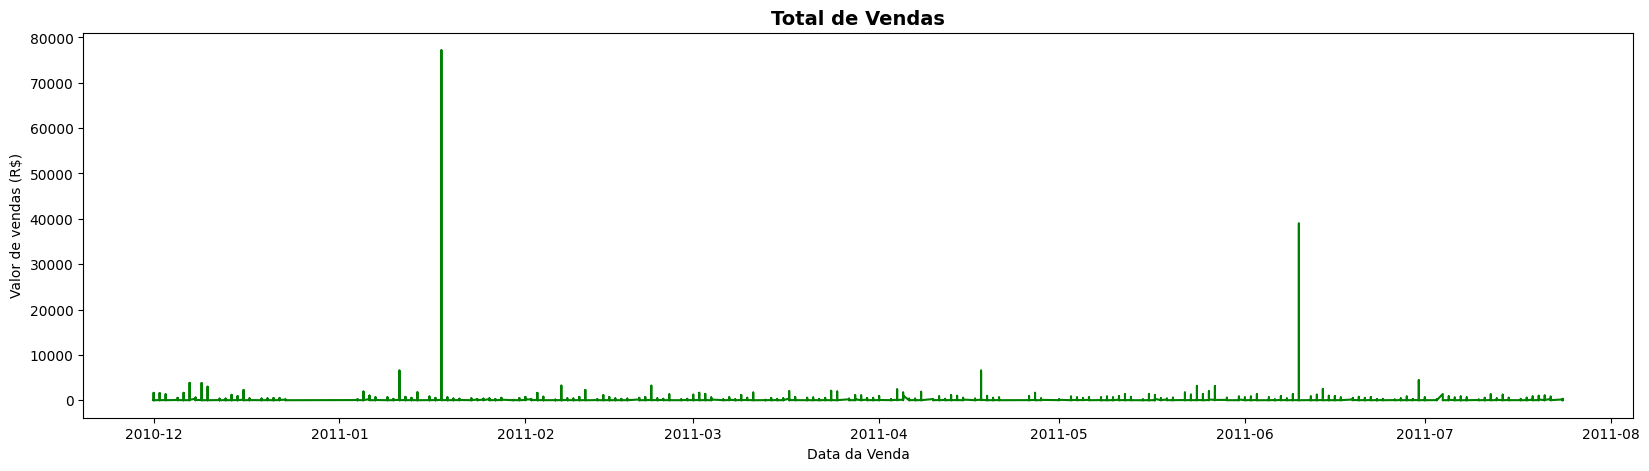

In [ ]:
# TOTAL DE VENDAS:

fig = plt.figure(figsize=(20,5))
plt.xlabel("Data da Venda")
plt.ylabel("Valor de vendas (R$)")

x = compras["InvoiceDate"]
y = compras["PrecoTotalCompra"]

plt.plot(x,y, color = "green")
plt.title("Total de Vendas", fontsize=14, fontweight="bold")

plt.show()

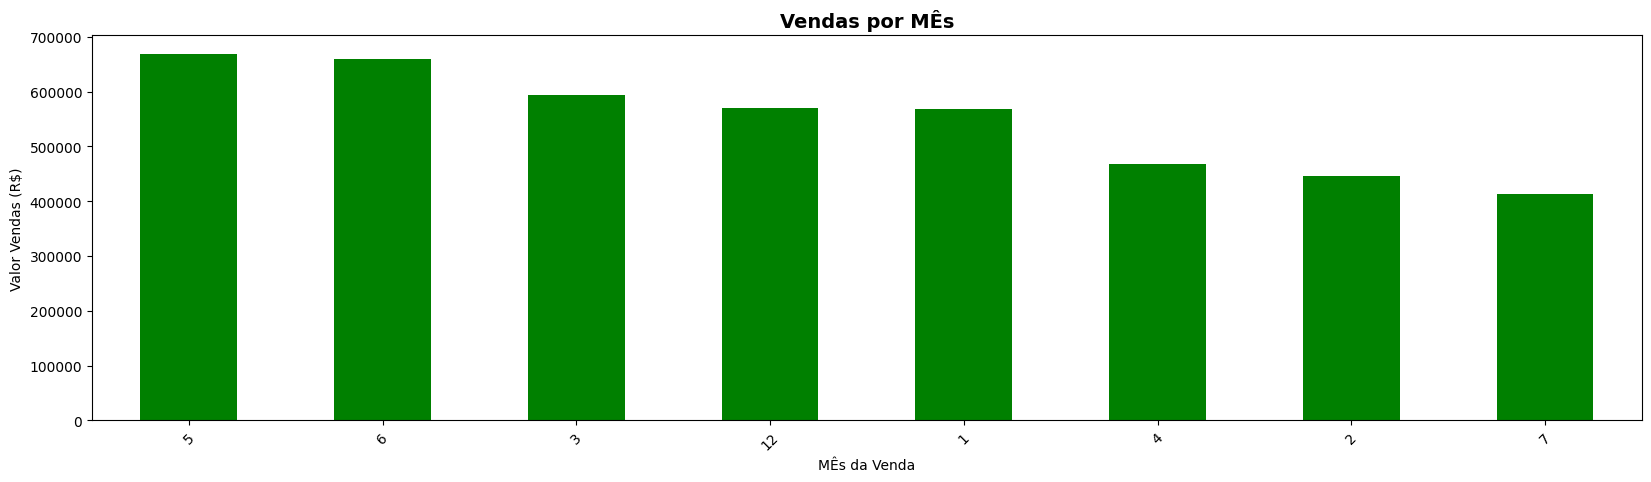

In [ ]:
# VENDAS POR MêS:

vendas_mês = compras.groupby(compras["InvoiceDate"].dt.month)['PrecoTotalCompra'].sum().nlargest(10).plot(kind="bar", color="green", figsize=(20,5), xlabel="MÊs da Venda", ylabel="Valor Vendas (R$)")
plt.title("Vendas por MÊs", fontsize=14, fontweight="bold")
plt.xticks(rotation=45)
plt.show()

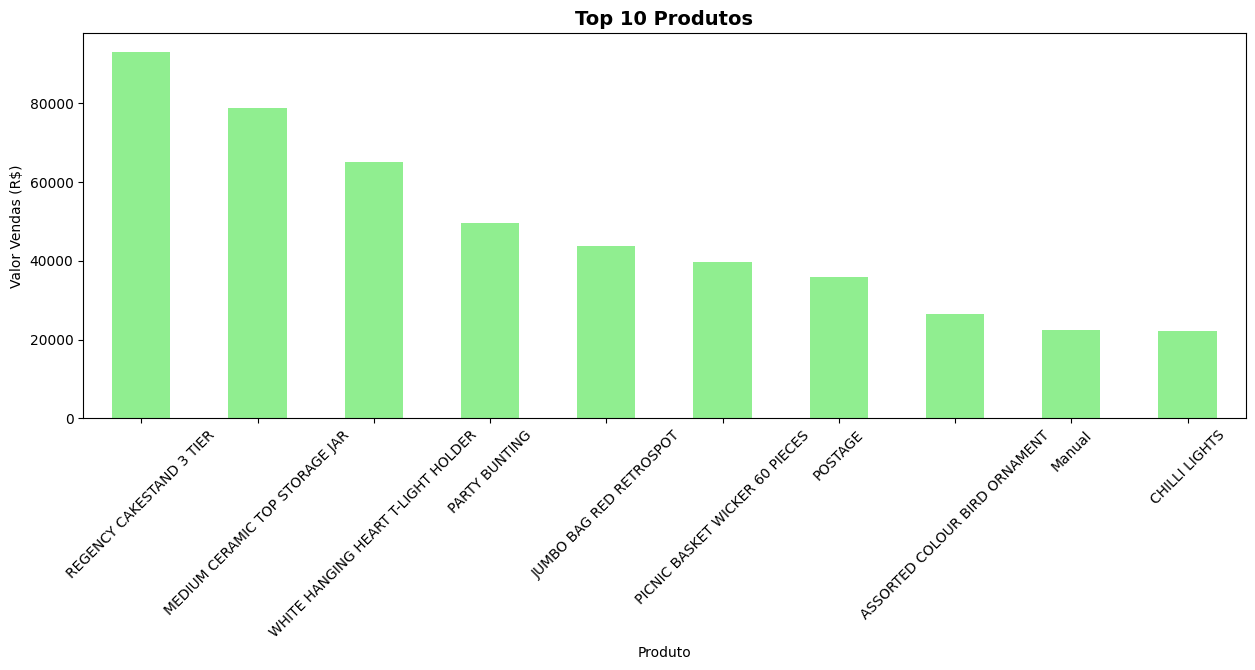

In [ ]:
# TOP 10 PRODUTOS MAIS VENDIDOS:

top_10_produtos = compras.groupby("Description")['PrecoTotalCompra'].sum().nlargest(10).plot(kind="bar", color="lightgreen", figsize=(15,5), xlabel="Produto", ylabel="Valor Vendas (R$)")
plt.title("Top 10 Produtos", fontsize=14, fontweight="bold")
plt.xticks(rotation=45)
plt.show()

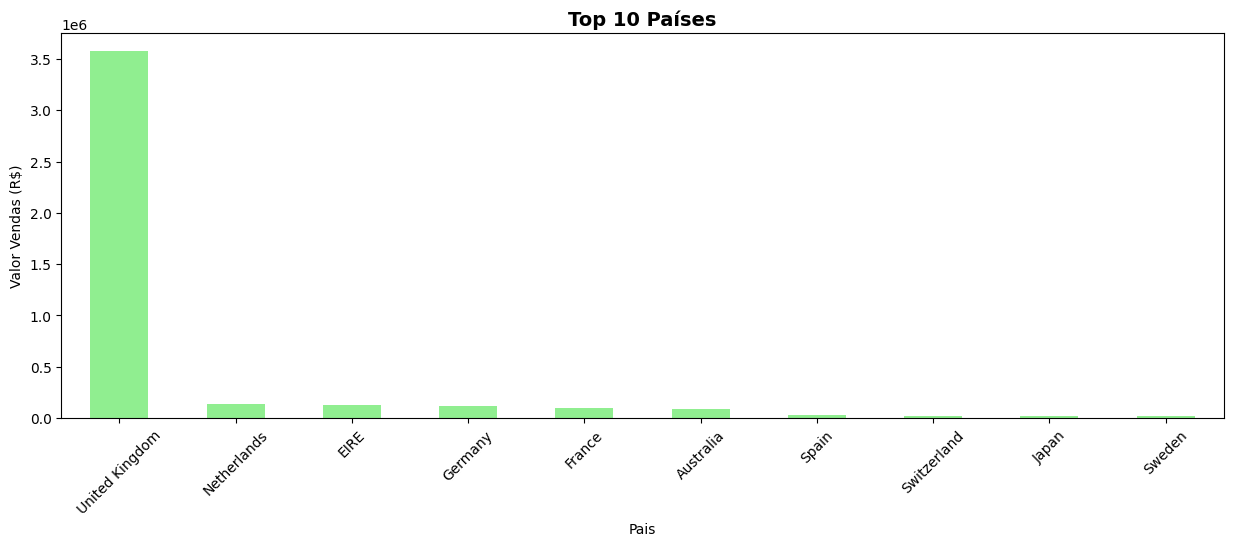

In [ ]:
# TOP 10 PAÍSES COM MAIOR VALOR EM VENDAS:

top_10_paises = compras.groupby("Country")['PrecoTotalCompra'].sum().nlargest(10).plot(kind="bar", color="lightgreen", figsize=(15,5), xlabel="Pais", ylabel="Valor Vendas (R$)", title="Top 10 Países")
plt.title("Top 10 Países", fontsize=14, fontweight="bold")
plt.xticks(rotation=45)
plt.show()


In [ ]:
# CALCULAR RFM:

# R é a recência, diferença em dias da última compra do cliente e da última compra disponível no conjunto de dados.

R = (UltimaCompra - compras["InvoiceDate"]).dt.days
print("R:", R)

R: 0         235
1         235
2         235
3         235
4         235
         ... 
276169      0
276170      0
276171      0
276172      0
276173      0
Name: InvoiceDate, Length: 190296, dtype: int64


In [ ]:
# F é a frequência, ou seja, a quantidade de compras feitas pelo cliente.

F = compras["InvoiceNo"].nunique()
print("F:", F)

F: 9765


In [ ]:
# M é o ticket médio, ou seja, a média das compras feitas pelo cliente.

M = round((compras["PrecoTotalCompra"].sum())/F, 2)
print("M: R$", M)

M: R$ 449.56
